<a href="https://colab.research.google.com/github/Sonu-1801/Diabetes/blob/main/Diabetes.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [ ]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt


In [ ]:
db=pd.read_csv('/content/diabetes.csv')
db.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 768 entries, 0 to 767
Data columns (total 9 columns):
 #   Column                    Non-Null Count  Dtype  
---  ------                    --------------  -----  
 0   Pregnancies               768 non-null    int64  
 1   Glucose                   768 non-null    int64  
 2   BloodPressure             768 non-null    int64  
 3   SkinThickness             768 non-null    int64  
 4   Insulin                   768 non-null    int64  
 5   BMI                       768 non-null    float64
 6   DiabetesPedigreeFunction  768 non-null    float64
 7   Age                       768 non-null    int64  
 8   Outcome                   768 non-null    int64  
dtypes: float64(2), int64(7)
memory usage: 54.1 KB


In [ ]:
db.isnull().sum()

,0
Pregnancies,0
Glucose,0
BloodPressure,0
SkinThickness,0
Insulin,0
BMI,0
DiabetesPedigreeFunction,0
Age,0
Outcome,0


In [ ]:
from sklearn.model_selection import train_test_split
from sklearn.linear_model import LogisticRegression

In [ ]:
db.head()

,Pregnancies,Glucose,BloodPressure,SkinThickness,Insulin,BMI,DiabetesPedigreeFunction,Age,Outcome
0,6,148,72,35,0,33.6,0.627,50,1
1,1,85,66,29,0,26.6,0.351,31,0
2,8,183,64,0,0,23.3,0.672,32,1
3,1,89,66,23,94,28.1,0.167,21,0
4,0,137,40,35,168,43.1,2.288,33,1


In [ ]:
x=db.drop(['Outcome'],axis=1)
y=db['Outcome']
y

,Outcome
0,1
1,0
2,1
3,0
4,1
...,...
763,0
764,0
765,0
766,1


In [ ]:
xtrain,xtest,ytrain,ytest=train_test_split(x,y,test_size=0.1,random_state=20)
xtrain

,Pregnancies,Glucose,BloodPressure,SkinThickness,Insulin,BMI,DiabetesPedigreeFunction,Age
425,4,184,78,39,277,37.0,0.264,31
476,2,105,80,45,191,33.7,0.711,29
461,1,71,62,0,0,21.8,0.416,26
678,3,121,52,0,0,36.0,0.127,25
173,1,79,60,42,48,43.5,0.678,23
...,...,...,...,...,...,...,...,...
218,5,85,74,22,0,29.0,1.224,32
223,7,142,60,33,190,28.8,0.687,61
271,2,108,62,32,56,25.2,0.128,21
474,4,114,64,0,0,28.9,0.126,24


In [ ]:
LGR=LogisticRegression()
LGR

LogisticRegression()

In [ ]:
LGR.fit(xtrain,ytrain)

/usr/local/lib/python3.11/dist-packages/sklearn/linear_model/_logistic.py:465: ConvergenceWarning: lbfgs failed to converge (status=1):
STOP: TOTAL NO. of ITERATIONS REACHED LIMIT.

Increase the number of iterations (max_iter) or scale the data as shown in:
    https://scikit-learn.org/stable/modules/preprocessing.html
Please also refer to the documentation for alternative solver options:
    https://scikit-learn.org/stable/modules/linear_model.html#logistic-regression
  n_iter_i = _check_optimize_result(


LogisticRegression()

In [ ]:
ypred=LGR.predict(xtest)
ypred

array([0, 1, 0, 0, 0, 0, 0, 0, 1, 0, 1, 0, 0, 0, 0, 0, 0, 0, 0, 1, 0, 0,
       0, 0, 1, 0, 0, 0, 1, 1, 1, 0, 1, 0, 1, 1, 0, 0, 0, 1, 1, 0, 1, 0,
       0, 0, 0, 0, 1, 0, 0, 0, 1, 0, 1, 0, 0, 1, 0, 0, 0, 0, 0, 0, 0, 1,
       0, 0, 0, 0, 0, 0, 0, 0, 1, 0, 0])

In [ ]:
ytest

,Outcome
143,1
14,1
504,0
557,0
736,0
...,...
385,0
505,0
261,1
182,0


In [ ]:
from sklearn.metrics import accuracy_score

In [ ]:
ac=accuracy_score(ytest,ypred)
ac

0.7792207792207793

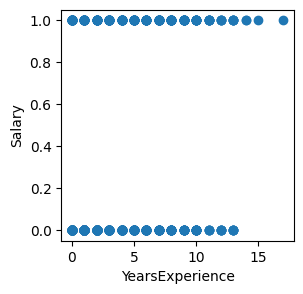

In [ ]:
plt.figure(figsize=(3,3))
plt.scatter(db['Pregnancies'],db['Outcome'])
plt.xlabel('YearsExperience')
plt.ylabel('Salary')
plt.show()

In [ ]:
l=[0,126,60,0,0,30.1,2.349,79]
a=np.array(l).reshape(1,-1)
ans=LGR.predict(a)
print(ans)
if(int(ans)==0):
  print('Non-Diabetic')
else:
  print('Diabetic')

[1]
Diabetic


/usr/local/lib/python3.11/dist-packages/sklearn/utils/validation.py:2739: UserWarning: X does not have valid feature names, but LogisticRegression was fitted with feature names
  warnings.warn(
<ipython-input-16-9079ab7b24c4>:5: DeprecationWarning: Conversion of an array with ndim > 0 to a scalar is deprecated, and will error in future. Ensure you extract a single element from your array before performing this operation. (Deprecated NumPy 1.25.)
  if(int(ans)==0):


In [ ]:
def diap(preg,glucose,bp,skin,ins,bmi,dpf,age):
  a=np.array([preg,glucose,bp,skin,ins,bmi,dpf,age]).reshape(1,-1)
  ans=LGR.predict(a)
  print(ans)
  if(int(ans)==0):
   return 'Non-Diabetic'
  else:
   return 'Diabetic'


In [ ]:
pip install gradio

   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 62.2/62.2 MB 11.3 MB/s eta 0:00:00
   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 321.9/321.9 kB 26.3 MB/s eta 0:00:00
   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 94.8/94.8 kB 10.3 MB/s eta 0:00:00
   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 12.5/12.5 MB 73.7 MB/s eta 0:00:00
   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 71.5/71.5 kB 7.6 MB/s eta 0:00:00
   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 62.3/62.3 kB 6.6 MB/s eta 0:00:00
  Attempting uninstall: markupsafe
    Found existing installation: MarkupSafe 3.0.2
    Uninstalling MarkupSafe-3.0.2:
      Successfully uninstalled MarkupSafe-3.0.2


In [ ]:
import gradio as gr

In [ ]:
pip install gttS

In [ ]:
from gtts import gTTS
import os

In [ ]:
def dia(preg,glucose,bp,skin,ins,bmi,dpf,age):
 dg=diap(preg,glucose,bp,skin,ins,bmi,dpf,age)
 print(dg)
 tts=gTTS(text=dg,lang='en')
 audio_file="dg.mp3"
 tts.save(audio_file)
 os.system(f'start{audio_file}')
 return dg, audio_file

In [ ]:
iface=gr.Interface(
    fn=dia,
    inputs=[gr.Number(label='enter the preg'),gr.Number(label='enter the glucose'),gr.Number(label='enter the bp'),gr.Number(label='enter the skin'),gr.Number(label='enter the ins'),gr.Number(label='enter the bmi'),gr.Number(label='enter the dpf'),gr.Number(label='enter the age')],
    outputs=[gr.Text(),gr.Audio()]
)

In [ ]:
iface.launch()

Running Gradio in a Colab notebook requires sharing enabled. Automatically setting `share=True` (you can turn this off by setting `share=False` in `launch()` explicitly).

Colab notebook detected. To show errors in colab notebook, set debug=True in launch()
* Running on public URL: https://324d82a466b2e6d899.gradio.live

This share link expires in 72 hours. For free permanent hosting and GPU upgrades, run `gradio deploy` from the terminal in the working directory to deploy to Hugging Face Spaces (https://huggingface.co/spaces)
